**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 200.


In [2]:
#========================================================
#CALCULATING MILESTONE LIFETIME
#========================================================
total_iteration = 200

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink1 = 10.0

it_back = [0.0 for i in range(total_iteration)]
flux_back = 0.0
flux_back_array = []
sink2 = 6.0

lifetime = 0.0
force_eval = 0.0

count_forward = 0
count_backward = 0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    #print sum(wts)
    force_eval += (tau-1)*w.current.walkers*0.2
    print 'total simulation time = ', force_eval, 'ps'
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink1 and l[j][tau-1] >= sink1:
            it[i] += wts[j]
            #print wts[j], 'forwd'
            count_forward += 1
            for k in range(tau):
                if l[j][k] < sink1 and l[j][k+1] >= sink1:
                    flux += wts[j]
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
                    
        if l[j][0] > sink2 and l[j][tau-1] <= sink2:
            #print l[j,0], l[j,tau-1]
            it_back[i] += wts[j]
            #print wts[j], 'backwd'
            count_backward += 1
            for k in range(tau):
                #print 'elmnts',l[j,k]
                if l[j][k][0] > sink2 and l[j][k+1][0] <= sink2:
                    flux_back += wts[j]
                    #print flux_back, 'fback'
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
    flux_array.append(flux)
    flux_back_array.append(flux_back)
    
flux = flux/float(total_iteration*(tau-1))
flux_back = flux_back/float(total_iteration*(tau-1))

print "MFPT = ", 1./flux     
print "MFPT_back = ", 1./flux_back
print "lifetime = ", lifetime
print "forward probability = ", sum(it)
print "backward probability = ", sum(it_back)

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability #forward count #backward count"
print >>f1, 1./flux, 1./flux_back, lifetime, sum(it), sum(it_back), count_forward, count_backward
f1.close()

Setting iteration to iter 1.
total simulation time =  10.0 ps
Setting iteration to iter 2.
total simulation time =  50.0 ps
Setting iteration to iter 3.
total simulation time =  110.0 ps
Setting iteration to iter 4.
total simulation time =  160.0 ps
Setting iteration to iter 5.
total simulation time =  220.0 ps
Setting iteration to iter 6.
total simulation time =  270.0 ps
Setting iteration to iter 7.
total simulation time =  320.0 ps
Setting iteration to iter 8.
total simulation time =  380.0 ps
Setting iteration to iter 9.
total simulation time =  440.0 ps
Setting iteration to iter 10.
total simulation time =  520.0 ps
Setting iteration to iter 11.
total simulation time =  610.0 ps
Setting iteration to iter 12.
total simulation time =  690.0 ps
Setting iteration to iter 13.
total simulation time =  770.0 ps
Setting iteration to iter 14.
total simulation time =  870.0 ps
Setting iteration to iter 15.
total simulation time =  970.0 ps
Setting iteration to iter 16.
total simulation time

total simulation time =  9530.0 ps
Setting iteration to iter 132.
total simulation time =  9620.0 ps
Setting iteration to iter 133.
total simulation time =  9700.0 ps
Setting iteration to iter 134.
total simulation time =  9780.0 ps
Setting iteration to iter 135.
total simulation time =  9860.0 ps
Setting iteration to iter 136.
total simulation time =  9950.0 ps
Setting iteration to iter 137.
total simulation time =  10040.0 ps
Setting iteration to iter 138.
total simulation time =  10130.0 ps
Setting iteration to iter 139.
total simulation time =  10220.0 ps
Setting iteration to iter 140.
total simulation time =  10310.0 ps
Setting iteration to iter 141.
total simulation time =  10390.0 ps
Setting iteration to iter 142.
total simulation time =  10470.0 ps
Setting iteration to iter 143.
total simulation time =  10560.0 ps
Setting iteration to iter 144.
total simulation time =  10650.0 ps
Setting iteration to iter 145.
total simulation time =  10730.0 ps
Setting iteration to iter 146.
t

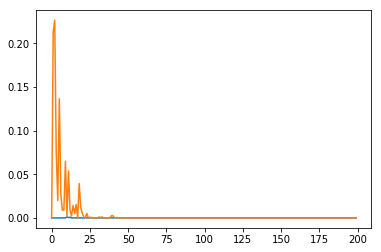

In [3]:
#Forward and backward first passage time distributions
plt.plot(it)
plt.plot(it_back)

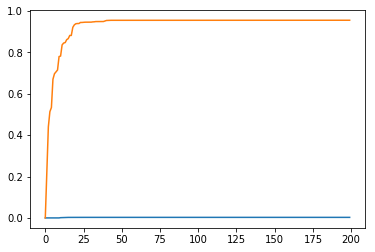

In [4]:
#check for convergence
plt.plot(flux_array)
plt.plot(flux_back_array)
f1 = open('flux.dat','w')
print >>f1, '#time #flux_forward #flux_backward'

for i in range(len(it)):
    print >>f1, i*(tau-1), flux_array[i], flux_back_array[i]
    
f1.close()

In [5]:
print it
f1 = open('FPTD_forward.dat','w')

for i in range(len(it)):
    print >>f1, i*(tau-1), it[i]
    
f1.close()


f2 = open('FPTD_back.dat','w')

for i in range(len(it)):
    print >>f2, i*(tau-1), it_back[i]
    
f2.close()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011814814814814815, 0.00036666666666666662, 0.00079520987654320982, 1.3580246913580247e-05, 5.2142661179698214e-05, 8.148148148148149e-05, 6.3262208504801103e-05, 0.0, 1.5504320987654319e-05, 3.42712962962963e-05, 1.0185185185185185e-05, 9.0534979423868316e-06, 4.0288888888888891e-06, 4.2008395061728392e-06, 3.1872366255144035e-06, 3.2064471879286696e-06, 7.0400805898491085e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.4852459983380619e-08, 3.8724955537089578e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.7033929999717198e-14, 7.8389883332861989e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0